## Table of Contents

1. [Importing Libraries](#import)
2. [Data Overview](#data-overview)
3. [Data Cleaning](#data-cleaning)
   - [Removing Duplicates](#removing-duplicates)
   - [Data Type Conversions](#data-type-conversions)
   - [Handling Missing Values](#handling-missing-values)
   - [Handling Multiclass](#handling-multiclass)
4. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
   - [Summary Statistics](#summary-statistics)
   - [Distribution of Features](#distribution-of-features)
   - [Main Category Analysis](#main-category-analysis)
   - [Sub Category Analysis](#sub-category-analysis)
   - [Top Products & Worst Product](#top-products)
   - [Correlation Analysis](#correlation-analysis)
5. [Review Analysis](#review-analysis)
     - [Text Processing](#text-processing)
     - [Word Cloud ](#word-cloud)
     - [Sentiment Analysis](#sentiment-analysis)
6. [Conclusion](#conclusion)
   - [Key Findings](#key-findings)
   - [Recommendations](#recommendations)


# 1. Importing Libraries <a id="import"></a>

Make sure the following libraries are installed:

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#text processing 
import nltk
from nltk.corpus import stopwords
import string
import emoji
from collections import Counter
from wordcloud import WordCloud
from transformers import pipeline
import math

nltk.download('stopwords')
nltk.download('punkt')


%matplotlib inline 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kur0ii/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/kur0ii/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 2. Data Overview <a class="anchor" id="data-overview"></a>

In [2]:
df = pd.read_csv("amazon.csv")

df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [3]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [4]:
df[df.duplicated()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


# 3. Data Cleaning <a id="data-cleaning"></a>

### 3.1 Removing duplicates <a id="removing-duplicates"></a>

In [5]:

df = df.drop_duplicates(subset=["product_id"], keep='first')
df.reset_index(drop=True, inplace=True)

### 3.2 Data type conversions <a id="data-type-conversions"></a>

In [6]:
df.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

We observe that all categories are of type object, but some should be numeric.

In [7]:
def format_string_numbers(text):
    if pd.notna(text):
        number = ''.join([ch for ch in str(text) if ch.isdigit() or ch == '.'])
        return number if number else np.nan
    return text

# example
print(format_string_numbers("|"))        # Output: nan
print(format_string_numbers("$$100$"))   # Output: "100"
print(format_string_numbers("9,000$"))   # Output: "9000"
print(format_string_numbers("400.1"))    # Output: "400.1"
print(format_string_numbers("4.01111111111111"))
columns_values = ["discounted_price", "actual_price", "discount_percentage", "rating", "rating_count"]

for col in columns_values:
    df[col] = df[col].apply(format_string_numbers)
    df[col] = pd.to_numeric(df[col])

df.dtypes

nan
100
9000
400.1
4.01111111111111


product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage      int64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object

### 3.3 Handling Missing Values <a id="handling-missing-values"></a>

In [8]:
# Identification and handling of NaN values
print(f"Columns containing empty cells: {df.columns[df.isnull().any()]}\n")

# Identification of products with a null rating
product_names = df[df['rating'].isnull()]["product_name"]
print("Rows with null rating:\n", product_names, "\n")

# Identification of products with a null rating count 
product_names = df[df['rating_count'].isnull()]["product_name"]
print("Rows with null rating_count:\n", product_names, "\n")



Columns containing empty cells: Index(['rating', 'rating_count'], dtype='object')

Rows with null rating:
 1165    Eureka Forbes car Vac 100 Watts Powerful Sucti...
Name: product_name, dtype: object 

Rows with null rating_count:
 282    Amazon Brand - Solimo 65W Fast Charging Braide...
324    REDTECH USB-C to Lightning Cable 3.3FT, [Apple...
Name: product_name, dtype: object 



In [9]:
# FIX RATING : Eureka Forbes 
# We will take the average rating of Eureka Forbes products and assign it

eureka_mask = df['product_name'].str.contains("Eureka Forbes")
eureka_avg_rating = df[eureka_mask]['rating'].mean()
df.loc[eureka_mask, 'rating'] = df.loc[eureka_mask, 'rating'].fillna(eureka_avg_rating)

In [10]:
# FIX RATING_COUNT : Amazon Brand - Solimo 65W Fast Charging
amazon_mask = df['product_name'].str.contains("Amazon Brand - Solimo")
amazon_avg_rating_count = df[amazon_mask]['rating_count'].mean()
df.loc[amazon_mask, 'rating_count'] = df.loc[amazon_mask, 'rating_count'].fillna(amazon_avg_rating_count)

In [11]:
# FIX RATING_COUNT : REDTECH USB-C to Lightning Cable 3.3FT
# We chose to sort by cable type as it is the only one in the dataset from the Redtech brand

redtech_avg_rating_count = df[df['product_name'].str.contains("USB-C")]['rating_count'].mean()
redtech_mask = df['product_name'].str.contains("REDTECH")
df.loc[redtech_mask, 'rating_count'] = df.loc[redtech_mask, 'rating_count'].fillna(redtech_avg_rating_count)

In [12]:
print(f"Columns containing empty cells: {df.columns[df.isnull().any()]}\n")

Columns containing empty cells: Index([], dtype='object')



### 3.4 : Handling Multiclass <a id="handling-multiclass"></a>


In [13]:
df_categories = df['category'].str.split('|', expand=True)

df_categories.columns = ["main_category","sub_category_1","sub_category_2","sub_category_3","sub_category_4","sub_category_5","sub_category_6",]

df = pd.concat([df, df_categories], axis=1)

df.drop(columns="category",axis=1)

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,...,review_content,img_link,product_link,main_category,sub_category_1,sub_category_2,sub_category_3,sub_category_4,sub_category_5,sub_category_6
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...",...,Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...",...,I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...",...,"Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...",...,"Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...",...,"Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379.0,919.0,59,4.0,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...",...,"I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
1347,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,2280.0,3045.0,25,4.1,4118.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...",...,"ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
1348,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,2219.0,3080.0,28,3.6,468.0,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Neh

# 4. Exploratory Data Analysis (EDA) <a id="exploratory-data-analysis"></a>

### 4.1 Summary Statistics <a id="summary-statistics"></a>

In [14]:
df.describe(include="all")

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,review_content,img_link,product_link,main_category,sub_category_1,sub_category_2,sub_category_3,sub_category_4,sub_category_5,sub_category_6
count,1351,1351,1351,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351,1351,...,1351,1351,1351,1351,1351,1343,1201,442,85,13
unique,1351,1337,211,NaN,NaN,NaN,NaN,NaN,1290,1186,...,1197,1325,1351,9,29,71,136,56,14,7
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,NaN,NaN,NaN,Upto 12GB RAM with RAM Plus | 128GB internal m...,"AGAELRYPMTG5SADZPDYB343EASAA,AGFN4JODOM2NTFCJQ...",...,"I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Electronics,Kitchen&HomeAppliances,SmallKitchenAppliances,Cables,USBCables,DryIrons,StickBallpointPens
freq,1,5,161,NaN,NaN,NaN,NaN,NaN,4,8,...,8,3,1,490,308,181,192,161,24,3
mean,NaN,NaN,NaN,3304.801754,5691.176625,46.685418,4.091792,17623.415865,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,7173.975455,11218.666235,21.632611,0.297342,42118.121386,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,39.000000,39.000000,0.000000,2.000000,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,349.000000,899.000000,31.000000,3.900000,1101.500000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,899.000000,1795.000000,49.000000,4.100000,4740.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2174.000000,4575.000000,62.000000,4.300000,15995.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4.2 Distribution of Features <a id="distribution-of-features"></a>

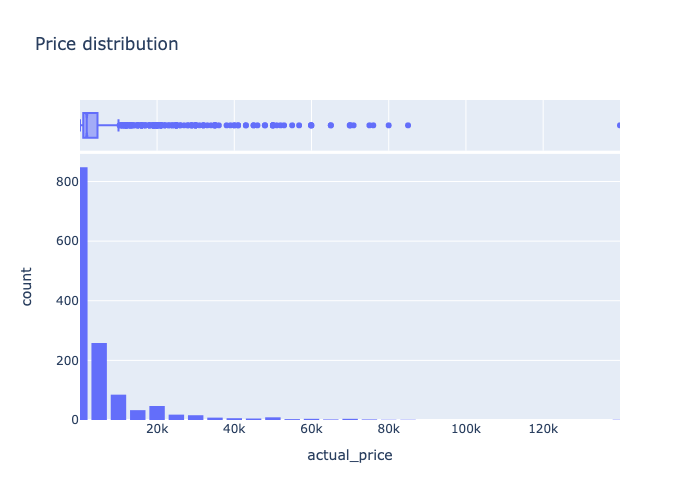

In [15]:
fig = px.histogram(df, x='actual_price', nbins=30, title='Price distribution', marginal="box")

min_price = df['actual_price'].min()
max_price = df['actual_price'].max()
fig.update_xaxes(range=[min_price, max_price])

fig.update_layout(bargap=0.2)
fig.show("png")


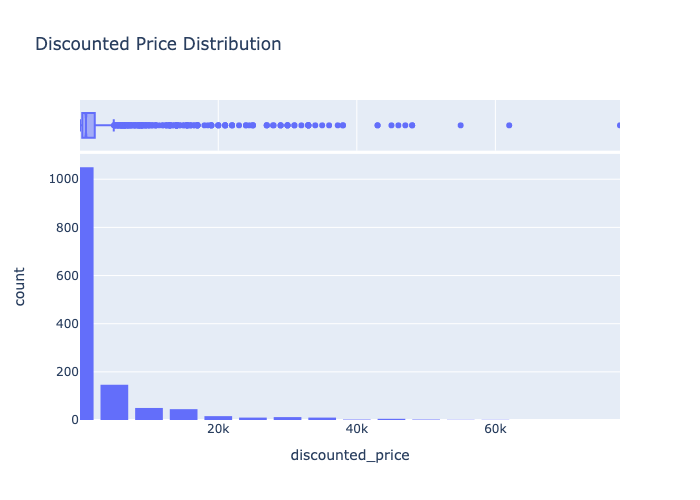

In [16]:
fig = px.histogram(df, x='discounted_price', nbins=20, title='Discounted Price Distribution',marginal="box")
min_discounted_price = df['discounted_price'].min()
max_discounted_price = df['discounted_price'].max()
fig.update_xaxes(range=[min_discounted_price, max_discounted_price])
fig.update_layout(bargap=0.2)
fig.show("png")

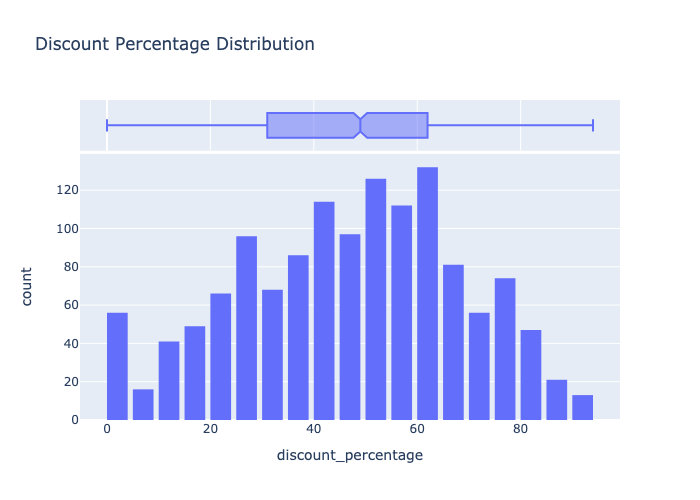

In [17]:
fig = px.histogram(df, x='discount_percentage', nbins=20, title='Discount Percentage Distribution',marginal="box")
fig.update_layout(bargap=0.2)
fig.show("png")

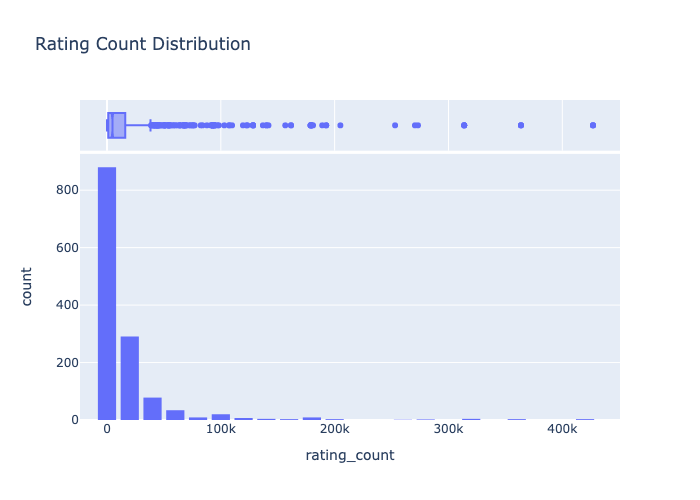

In [18]:
fig = px.histogram(df, x='rating_count', nbins=30, title="Rating Count Distribution", marginal="box")
fig.update_layout(bargap=0.2)
fig.show("png")

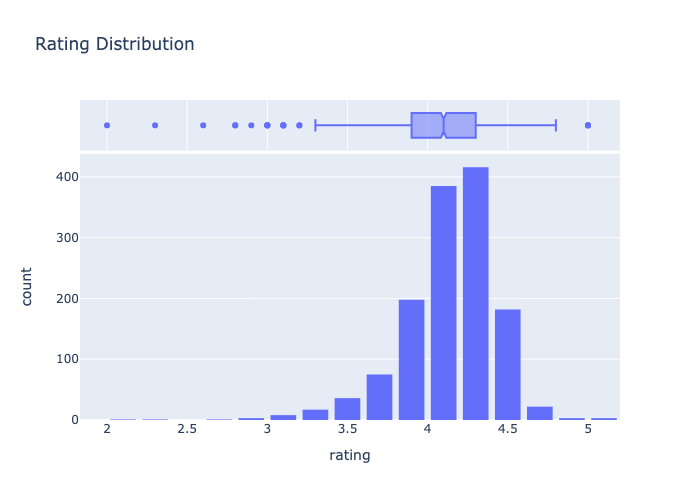

In [19]:
fig = px.histogram(df, x='rating', nbins=30, title="Rating Distribution", marginal="box")
fig.update_layout(bargap=0.2)
fig.show("png")

### 4.3 Main Category Analysis <a id="main-category-analysis"></a>

Containing many subcategories, we will limit ourselves to the analysis of the main categories

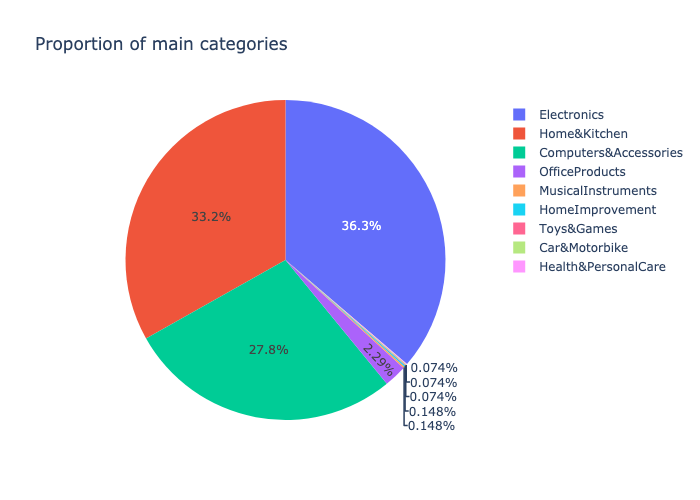

In [20]:
category_counts = df['main_category'].value_counts().reset_index()
category_counts.columns = ['main_category', 'count']
fig = px.pie(category_counts, values='count', names='main_category', title='Proportion of main categories')
fig.show("png")

We can observe that some categories are very small and not representative of the dataset, so we will focus only on Electronics, Home & Kitchen, and Computer & Accessories.

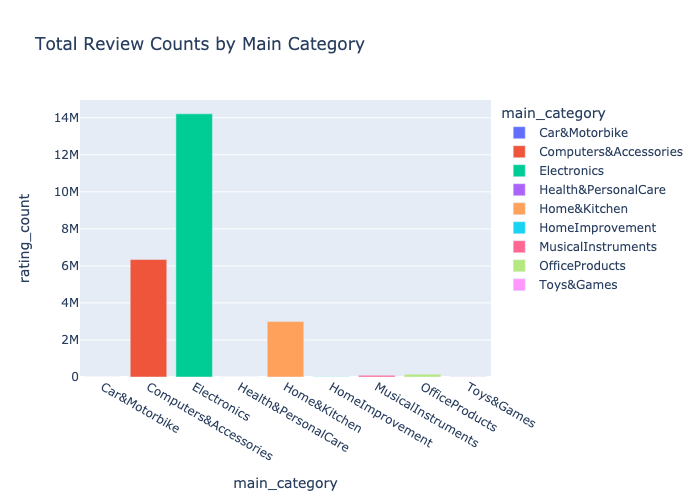

In [21]:
# La catégorie ayant le plus d'avis 
total_rating_count = df.groupby("main_category")["rating_count"].sum().reset_index()

fig = px.bar(total_rating_count, y="rating_count", x="main_category", color="main_category",title="Total Review Counts by Main Category")
fig.show("png")

Although it represents almost the same percentage of the dataset, we observe a significant gap in the number of evaluations: Electronics has the highest number of evaluations.

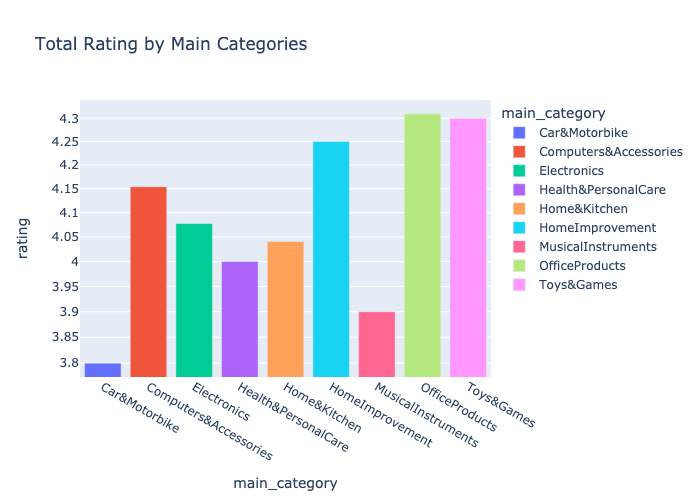

In [22]:

avg_main_category_rating = df.groupby("main_category")["rating"].mean().reset_index()

fig = px.bar(avg_main_category_rating,y="rating",x="main_category", color="main_category",title="Total Rating by Main Categories")
fig.update_layout(yaxis_type="log") 
fig.show("png")

By deselecting non-representative categories, we obtain the following ranking
1 -  Computers&Accessories
2 - Electronics
3 - Home&Kitchen

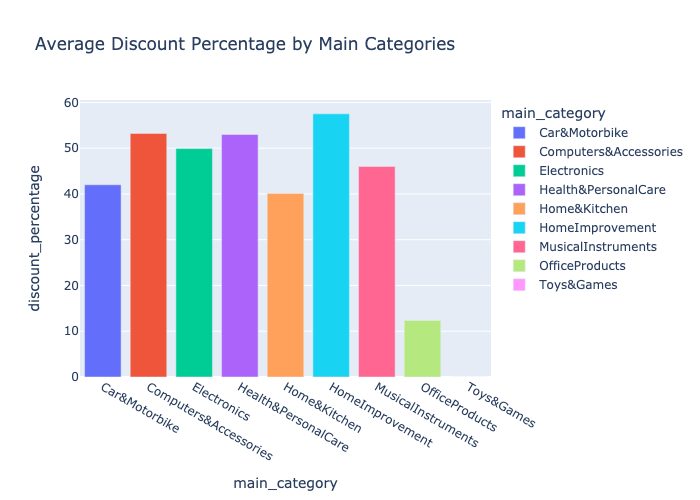

In [23]:

avg_main_category_discount= df.groupby("main_category")["discount_percentage"].mean().reset_index()

fig = px.bar(avg_main_category_discount,y="discount_percentage",x="main_category", color="main_category",title="Average Discount Percentage by Main Categories")
fig.show("png")

### 4.4 Sub Category Analysis <a id="sub-category-analysis"></a>

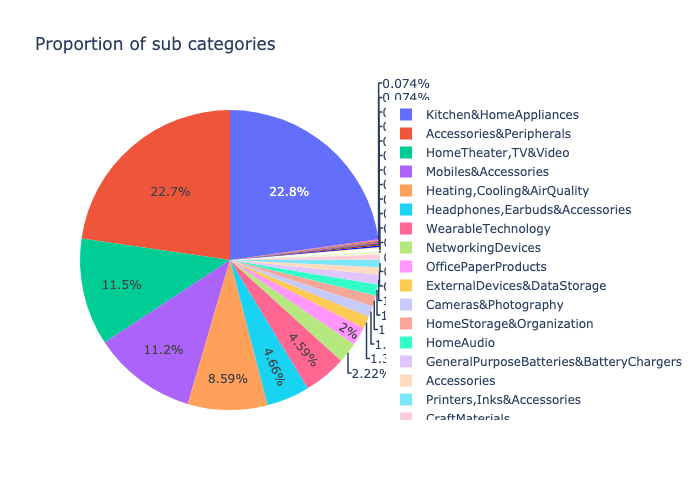

In [24]:
sub_category_counts = df['sub_category_1'].value_counts().reset_index()
sub_category_counts.columns = ['sub_category_1', 'count']
fig = px.pie(sub_category_counts, values='count', names='sub_category_1', title='Proportion of sub categories')
fig.show("png")

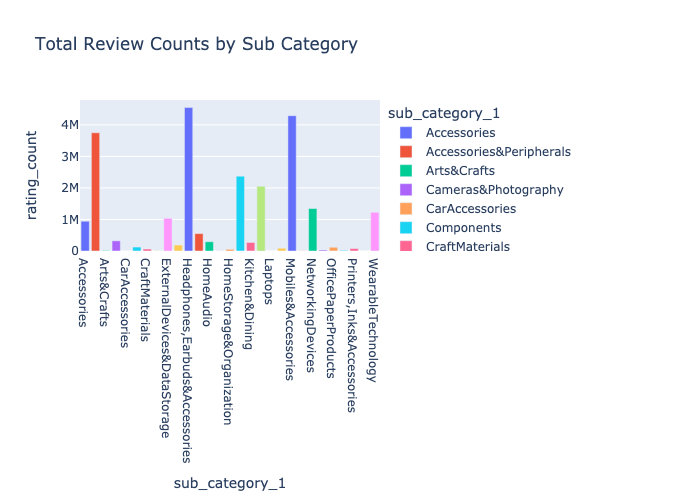

In [25]:
# La catégorie ayant le plus d'avis 
total_rating_count = df.groupby("sub_category_1")["rating_count"].sum().reset_index()

fig = px.bar(total_rating_count, y="rating_count", x="sub_category_1", color="sub_category_1",title="Total Review Counts by Sub Category")
fig.show("png")

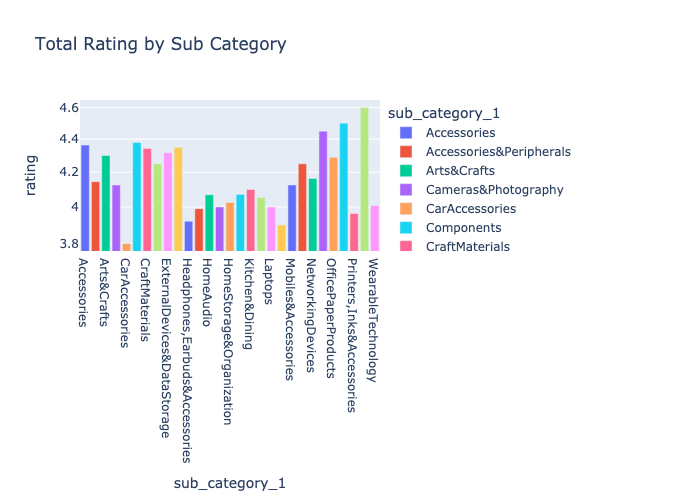

In [26]:

avg_sub_category_rating = df.groupby("sub_category_1")["rating"].mean().reset_index()

fig = px.bar(avg_sub_category_rating,y="rating",x="sub_category_1", color="sub_category_1",title="Total Rating by Sub Category")
fig.update_layout(yaxis_type="log") 
fig.show("png")

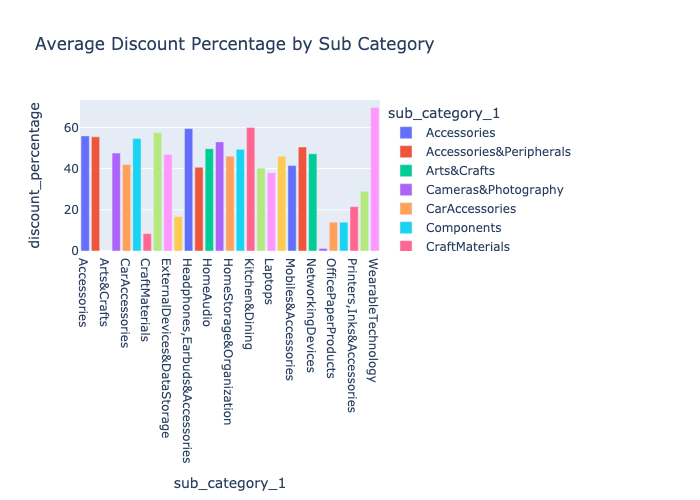

In [27]:

avg_sub_category_discount= df.groupby("sub_category_1")["discount_percentage"].mean().reset_index()

fig = px.bar(avg_sub_category_discount,y="discount_percentage",x="sub_category_1", color="sub_category_1",title="Average Discount Percentage by Sub Category")
fig.show("png")

### 4.5 Top Products & Worst Product <a id="top-products"></a>

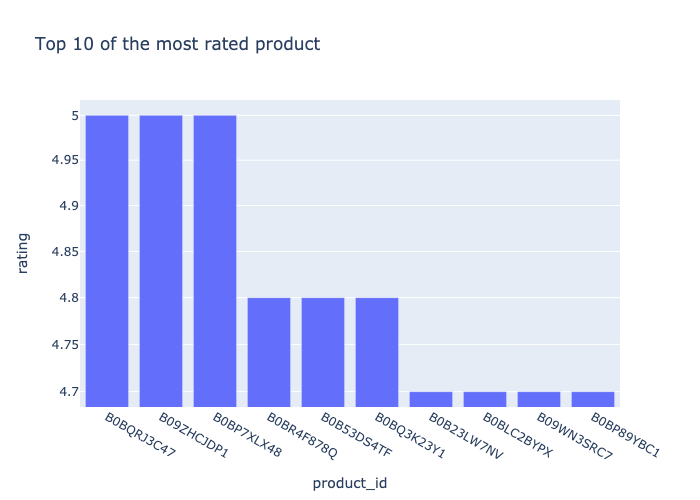

In [28]:
# Most Rate product 
top_10_best_product = df.sort_values(by="rating", ascending=False).head(10)
fig = px.bar(top_10_best_product,y="rating",x="product_id",title="Top 10 of the most rated product ")
fig.update_layout(yaxis_type="log") 
fig.show("png")

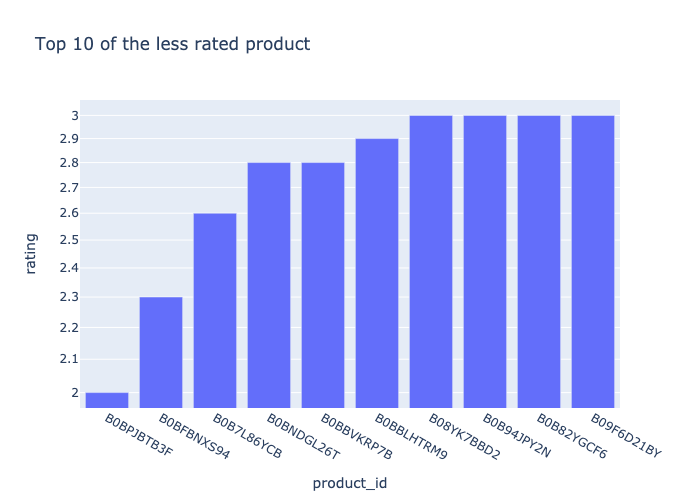

In [29]:
# worst Rate product 
top_10_worst_product = df.sort_values(by="rating").head(10)
fig = px.bar(top_10_worst_product,y="rating",x="product_id",title="Top 10 of the less rated product ")
fig.update_layout(yaxis_type="log") 
fig.show("png")

### 4.6 Correlation Analysis <a id="correlation-analysis"></a>

In [30]:
numerical_df = df.select_dtypes(include=['number'])
numerical_df.corr()

,discounted_price,actual_price,discount_percentage,rating,rating_count
discounted_price,1.000000,0.962263,-0.236517,0.126394,-0.023835
actual_price,0.962263,1.000000,-0.111786,0.127114,-0.034257
discount_percentage,-0.236517,-0.111786,1.000000,-0.161389,0.003148
rating,0.126394,0.127114,-0.161389,1.000000,0.096599
rating_count,-0.023835,-0.034257,0.003148,0.096599,1.000000


The strongest relationship observed is between discounted price and actual price, which is to be expected as discounts are applied to the actual prices.

Most of the other correlations are weak, indicating that factors like discount percentage, rating, and rating count do not have strong linear relationships with each other or with prices.

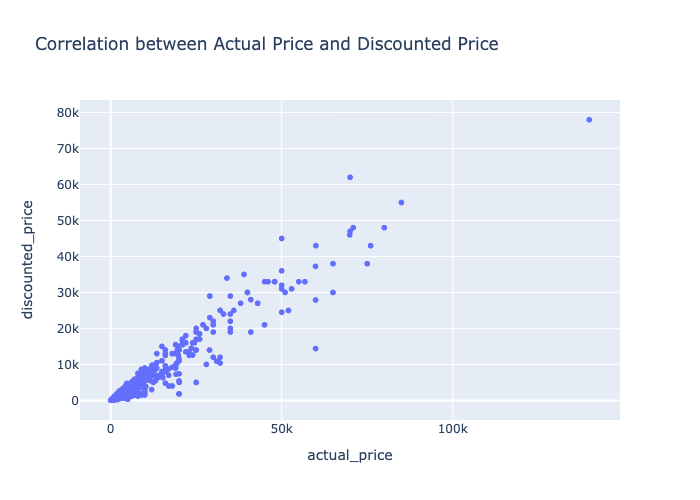

In [31]:

fig = px.scatter(df,x="actual_price", y="discounted_price",title="Correlation between Actual Price and Discounted Price")
fig.show("png")

# 5. Review Analysis <a id="review-analysis"></a>

### 5.1 Text processing <a id="text-processing"></a>

In [32]:
notstopwords = set(('not','no','never','nor'))
mystopwords = set(stopwords.words('english')) - notstopwords

def clean_text(txt):
    txt = emoji.demojize(txt)
    txt = txt.lower()
    translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    txt = txt.translate(translator)
    tokens = nltk.word_tokenize(txt)
    txt = ' '.join([word for word in tokens if word not in mystopwords])
    return txt



### 5.2 Word Cloud  <a id="word-cloud"></a>

(-0.5, 799.5, 399.5, -0.5)

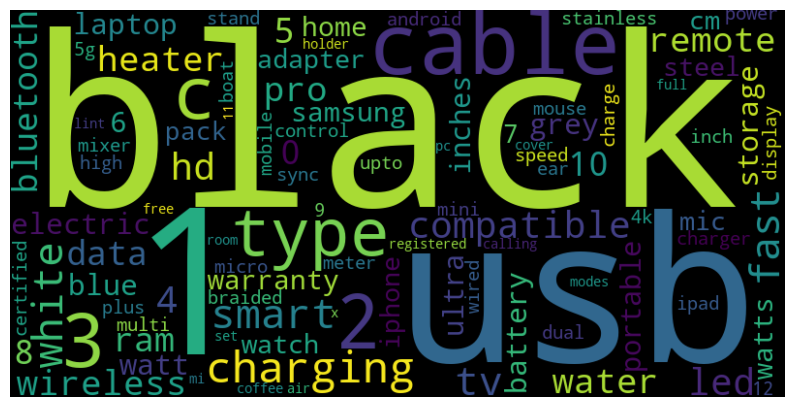

In [33]:
df_product_name = df['product_name'].apply(clean_text)
word_counts = Counter(" ".join(df_product_name).split())
wordcloud = WordCloud(width=800, height=400, max_words=100).generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

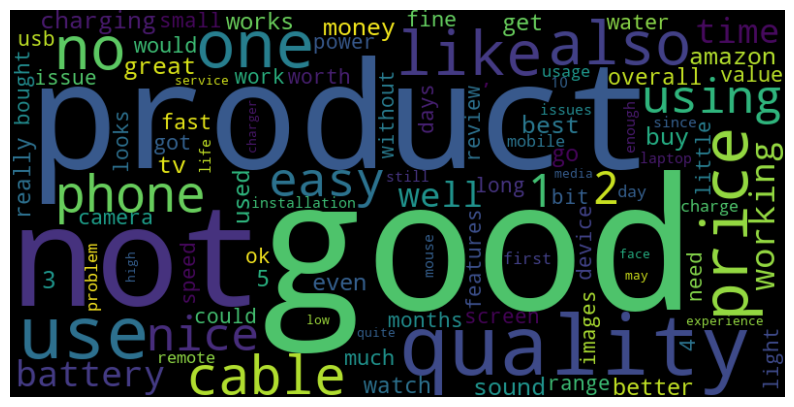

In [34]:
df_clean_review_content = df['review_content'].apply(clean_text)
word_counts = Counter(" ".join(df_clean_review_content).split())
wordcloud = WordCloud(width=800, height=400, max_words=100).generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 5.3 Sentiment Analysis (BERT) <a id="sentiment-analysis"></a>

On va comparer le rating avec le sentiment analysis pour chaque produit à partir du review_content 
df_sentiment (product_id, review_content, rating, sentiment_analysis), on va utiliser un modèle hugging face 

In [35]:
from transformers import pipeline

sentiment = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [36]:
import pandas as pd
from collections import Counter

def get_sentiment_label_and_score(text):
    result = sentiment(text)[0]
    return result['label'], result['score']

def analyze_review_title(review_title):
    phrases = review_title.split(',')  
    sentiment_results = [get_sentiment_label_and_score(phrase.strip()) for phrase in phrases]
    
    label_scores = {'positive': 0, 'neutral': 0, 'negative': 0}
    label_counts = Counter()

    for label, score in sentiment_results:
        label_scores[label] += score
        label_counts[label] += 1
    
    # Average Score
    for label in label_scores:
        if label_counts[label] > 0:
            label_scores[label] /= label_counts[label]
    
    dominant_label = label_counts.most_common(1)[0][0]
    
    # If equals most common labels
    most_common_labels = [label for label, count in label_counts.items() if count == label_counts[dominant_label]]
    if len(most_common_labels) > 1:
        dominant_label = max(most_common_labels, key=lambda label: label_scores[label])
    
    return dominant_label, label_scores[dominant_label]


df[['label', 'sentiment_score']] = df['review_title'].apply(lambda x: pd.Series(analyze_review_title(x)))

print(df[['review_title', 'label', 'sentiment_score']])




                                           review_title     label  \
0     Satisfied,Charging is really fast,Value for mo...  positive   
1     A Good Braided Cable for Your Type C Device,Go...  positive   
2     Good speed for earlier versions,Good Product,W...  positive   
3     Good product,Good one,Nice,Really nice product...  positive   
4     As good as original,Decent,Good one for second...  positive   
...                                                 ...       ...   
1346  Received the product without spanner,Excellent...  positive   
1347  ok,everything was good couldn't return bcoz I ...  positive   
1348  very good,Work but front melt after 2 month,Go...  positive   
1349  Fan Speed is slow,Good quality,Good product,go...  positive   
1350  Works perfect,Ok good product,Nice Product. Re...  positive   

      sentiment_score  
0            0.846613  
1            0.759508  
2            0.854558  
3            0.843464  
4            0.815164  
...               ...  
134

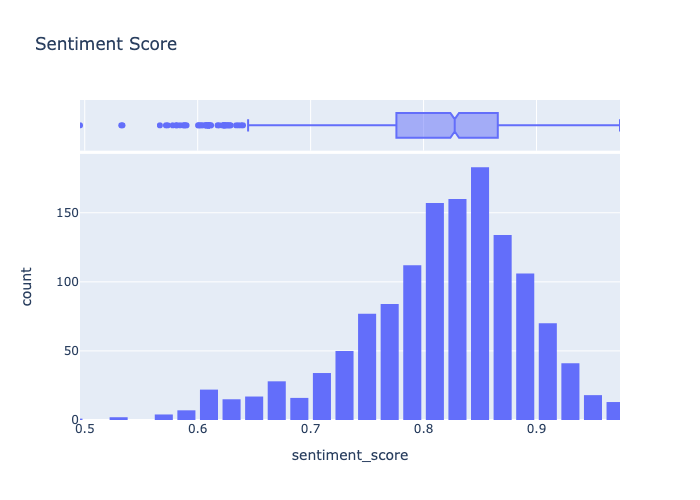

In [37]:

fig = px.histogram(df, x='sentiment_score', nbins=30, title='Sentiment Score', marginal="box")

min_price = df['sentiment_score'].min()
max_price = df['sentiment_score'].max()
fig.update_xaxes(range=[min_price, max_price])
fig.update_layout(bargap=0.2)
fig.show("png")

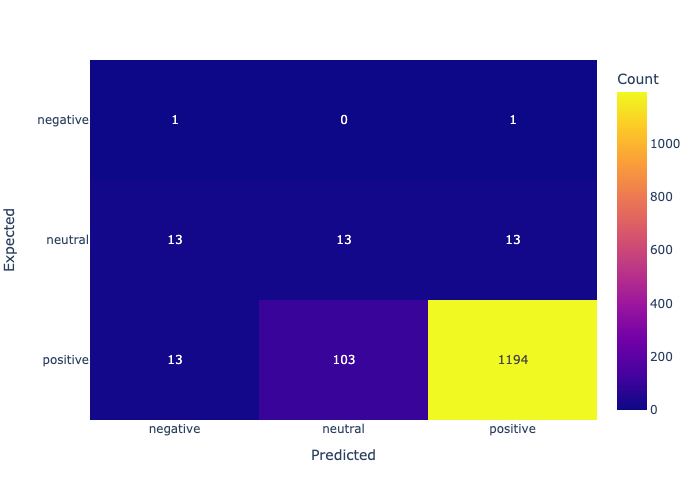

In [38]:
import pandas as pd
import plotly.express as px
from sklearn.metrics import confusion_matrix

def map_rating_to_sentiment(rating):
    rating = round(rating)
    if rating < 3: 
        return 'negative'
    elif rating == 3:  
        return 'neutral'
    else:  
        return 'positive'
    
df['expected_label'] = df['rating'].apply(map_rating_to_sentiment)

cm = confusion_matrix(df['expected_label'], df["label"], labels=['negative', 'neutral', 'positive'])
cm_df = pd.DataFrame(cm, index=['negative', 'neutral', 'positive'], columns=['negative', 'neutral', 'positive'])

fig = px.imshow(cm_df,
                labels=dict(x="Predicted", y="Expected", color="Count"),
                x=cm_df.columns,
                y=cm_df.index,
                text_auto=True,
                aspect="auto"
               )    
fig.show("png")


# 6. Conclusion <a id="conclusion"></a>

### 6.1 Key Finding <a id="key-finding"></a>

### 6.2 Recommandations <a id="recommandations"></a>

<!-- Exploration des données (EDA - Exploratory Data Analysis) :

Visualiser les premières lignes du dataset pour comprendre la structure et le contenu.
Identifier et gérer les valeurs manquantes.
Examiner les statistiques descriptives pour chaque colonne.

Analyse des catégories de produits :

Compter le nombre de produits par catégorie.
Identifier les catégories avec les plus fortes et les plus faibles ventes.

Analyse des prix et des remises :

Comparer les prix réduits et les prix réels pour déterminer les remises moyennes.
Visualiser la distribution des prix et des remises.
Identifier les produits avec les plus grandes remises.

Analyse des évaluations et des avis :

Analyser la distribution des notes des produits.
Identifier les produits les mieux notés et les moins bien notés.
Analyser le nombre d'avis par produit.
Effectuer une analyse de texte sur les titres et contenus des avis pour identifier les thèmes courants.

Analyse des utilisateurs :

Compter le nombre d'avis par utilisateur.
Identifier les utilisateurs les plus actifs.

Visualisation des données :

Créer des graphiques pour illustrer les analyses précédentes (histogrammes, diagrammes en barres, box plots, nuages de mots pour les avis, etc.). -->